## Sequential Forward Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
#check row and columns
df.shape

(1303, 23)

In [6]:
#Check missing value
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
#check if any missing value
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22] # all columns/features except target 
y = df.iloc[:,-1]  #target

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
#training 0.3,
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Selection

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= 22, #number of features
                                                     forward=True,   # Forward Feature
                                                     floating=False,
                                                     verbose=2,       #how model is fitted
                                                     scoring= "f1",   #performance matric
                                                     cv= 5).fit(X_train, y_train)   #cross validation
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   13.3s finished

[2022-11-03 01:05:08] Features: 1/22 -- score: 0.8456042734185905[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   14.6s finished

[2022-11-03 01:05:23] Features: 2/22 -- score: 0.8492502442547046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.8s finished

[2022-11-03 01:05:38] Features: 3/22 -- score: 0.8567003693697213[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

{1: {'feature_idx': (10,),
  'cv_scores': array([0.87610619, 0.80542986, 0.84210526, 0.8558952 , 0.84848485]),
  'avg_score': 0.8456042734185905,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (10, 14),
  'cv_scores': array([0.83982684, 0.84210526, 0.83898305, 0.85087719, 0.87445887]),
  'avg_score': 0.8492502442547046,
  'feature_names': ('total_score', 'homepage')},
 3: {'feature_idx': (10, 14, 16),
  'cv_scores': array([0.86554622, 0.82051282, 0.86842105, 0.86206897, 0.86695279]),
  'avg_score': 0.8567003693697213,
  'feature_names': ('total_score', 'homepage', 'ouelluminate')},
 4: {'feature_idx': (1, 10, 14, 16),
  'cv_scores': array([0.86842105, 0.82251082, 0.85714286, 0.87553648, 0.87336245]),
  'avg_score': 0.8593947316773602,
  'feature_names': ('gender', 'total_score', 'homepage', 'ouelluminate')},
 5: {'feature_idx': (1, 10, 14, 16, 21),
  'cv_scores': array([0.8559322 , 0.85714286, 0.84848485, 0.86842105, 0.89177489]),
  'avg_score': 0.8643511706848015,
  'featur

In [16]:
forward_feature_selection.k_feature_idx_  #index number of features that significant

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [17]:
forward_feature_selection.k_feature_names_ #name of the features choosen

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [18]:
forward_feature_selection.k_score_

0.8396074318362725

In [23]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forward.randomforest.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
#ci_bound = cinfidence interval
#std_dev = standard deviation
#std_err = standard error

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8761061946902654, 0.8054298642533937, 0.842...",0.845604,"(total_score,)",0.029705,0.023112,0.011556
2,"(10, 14)","[0.8398268398268399, 0.8421052631578947, 0.838...",0.84925,"(total_score, homepage)",0.017084,0.013292,0.006646
3,"(10, 14, 16)","[0.865546218487395, 0.8205128205128206, 0.8684...",0.8567,"(total_score, homepage, ouelluminate)",0.023413,0.018216,0.009108
4,"(1, 10, 14, 16)","[0.868421052631579, 0.8225108225108225, 0.8571...",0.859395,"(gender, total_score, homepage, ouelluminate)",0.025072,0.019507,0.009754
5,"(1, 10, 14, 16, 21)","[0.8559322033898306, 0.8571428571428571, 0.848...",0.864351,"(gender, total_score, homepage, ouelluminate, ...",0.019435,0.015121,0.00756
6,"(1, 10, 13, 14, 16, 21)","[0.8559322033898306, 0.8558951965065502, 0.855...",0.860326,"(gender, total_score, glossary, homepage, ouel...",0.009852,0.007665,0.003832
7,"(1, 9, 10, 13, 14, 16, 21)","[0.8744588744588744, 0.8398268398268399, 0.853...",0.861599,"(gender, total_number_of_click, total_score, g...",0.019818,0.015419,0.007709
8,"(1, 5, 9, 10, 13, 14, 16, 21)","[0.8319327731092437, 0.8533333333333334, 0.848...",0.858264,"(gender, age_band, total_number_of_click, tota...",0.023392,0.018199,0.0091
9,"(1, 5, 9, 10, 13, 14, 16, 20, 21)","[0.849785407725322, 0.8546255506607929, 0.8680...",0.857077,"(gender, age_band, total_number_of_click, tota...",0.016563,0.012886,0.006443
10,"(1, 5, 9, 10, 13, 14, 16, 18, 20, 21)","[0.8438818565400844, 0.8546255506607929, 0.841...",0.852826,"(gender, age_band, total_number_of_click, tota...",0.014032,0.010917,0.005459


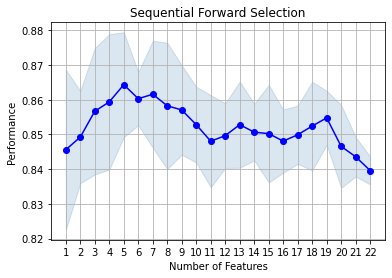

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [22]:
forward_feature_selection.k_score_

0.8396074318362725